In [1]:
#! /usr/bin/python
# -*- coding: utf-8 -*-
# ~.py

# Version: 2018.11.29.01

# Requiered libraries
import sys, os, math, time
import numpy as np
import scipy.linalg as cpy
import matplotlib.pyplot as plt
from numba import jit, njit, prange

In [2]:
@njit()
def g(x):
    return 0. #np.sin(math.pi*x)

@njit()
def explicit(X,T,u,alpha):
    b = 1.-2.*alpha
    for ii in range(0,T-1):
        for jj in range(1,X):
            u[ii+1,jj] = alpha*u[ii,jj-1] + (b)*u[ii,jj] + alpha*u[ii,jj+1]
    return u
            


In [3]:
N = 10
dt = 5e-3
T = 400

u = np.zeros((T,N+1), np.double)
(x,dx) = np.linspace(0,1,N+1, retstep=True)

alpha = dt/dx**2
u[0,:] = g(x)
u[0,0] = u[0,-1] = 0.
u[:,-1]= 1.
#u[0,-2]= 1.
print("alpha =\n",alpha)
print("x =\n",x)
print("u[0] =\n",u[0,:])

alpha =
 0.4999999999999999
x =
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
u[0] =
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [4]:
t0 = time.time()
sol = explicit(N,T,u,alpha)
t1 = time.time()
print(t1-t0)
#print(sol[-1,:])

0.15404987335205078


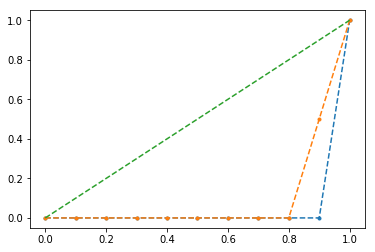

In [5]:
#%matplotlib qt
plt.plot(x,sol[0,:], '--.', label = "t=0")
plt.plot(x,sol[1,:], '--.', label = "t=0")
plt.plot(x,sol[-1,:], '--', label = "t=2*dt")
#plt.legend(loc='best')
plt.show()

In [6]:
%matplotlib qt
fig, ax = plt.subplots()
im = ax.imshow(np.flip(sol,0), cmap='jet')
cbar = fig.colorbar(im)
#print(sol[0,:])
#print(sol[1,:])
#print(sol[-1,:])